In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [31]:
os.makedirs('../reports/figures', exist_ok=True)

raw_data = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(raw_data)

In [32]:
# Basic overview
print("\nShape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst rows:")
print(df.head())


Shape: (7043, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   


In [33]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [34]:
# Convert 'TotalCharges' to numeric (some missing values might be whitespace)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [35]:
# Re-check missing
print("\nMissing after conversion:")
print(df.isnull().sum())


Missing after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [36]:
# Drop or impute missing TotalCharges
df = df.dropna(subset=['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].astype(float)


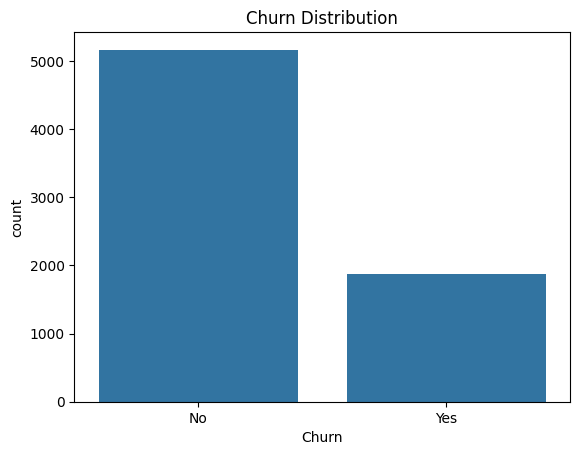

In [37]:
# Target variable distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.savefig("../reports/figures/churn_distribution.png")
plt.show()
# Insight: Imbalanced classes; fewer customers have churned.

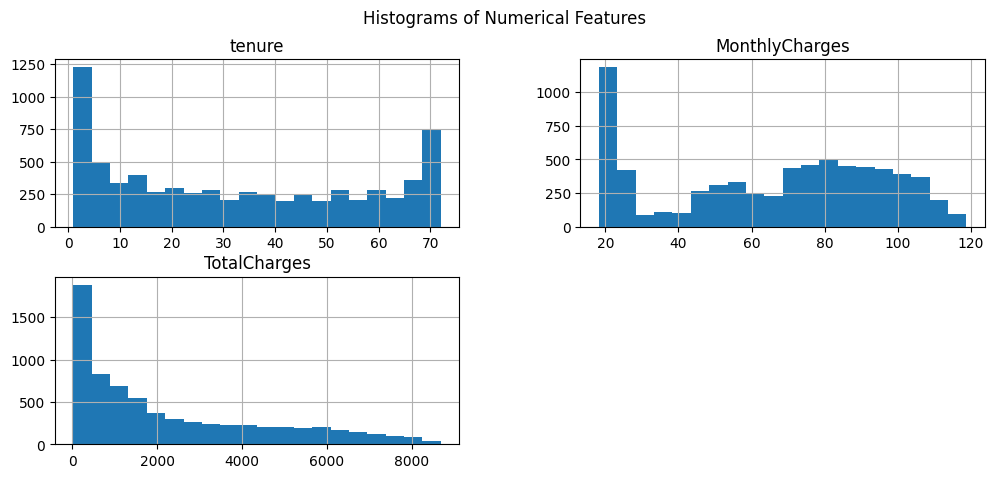

In [38]:
# Numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=20, figsize=(12, 5))
plt.suptitle('Histograms of Numerical Features')
plt.savefig("../reports/figures/numerical_histograms.png")
plt.show()
# Insight: Tenure is heavily right-skewed; many short-term customers. Total Charges are left- skewed

In [20]:
# Categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')  # exclude ID

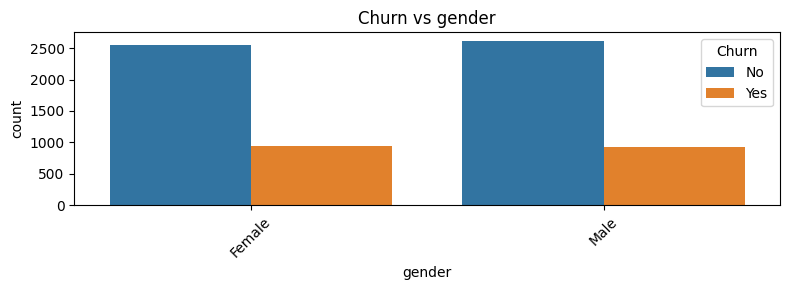

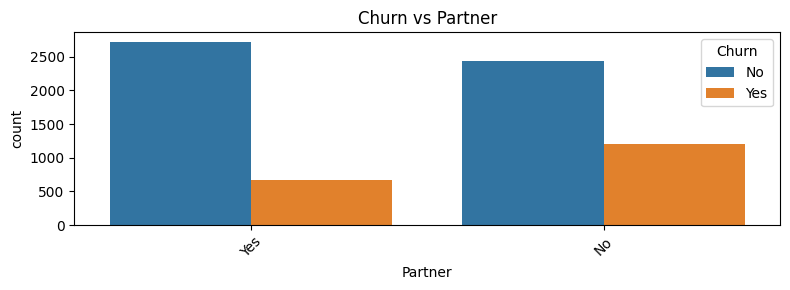

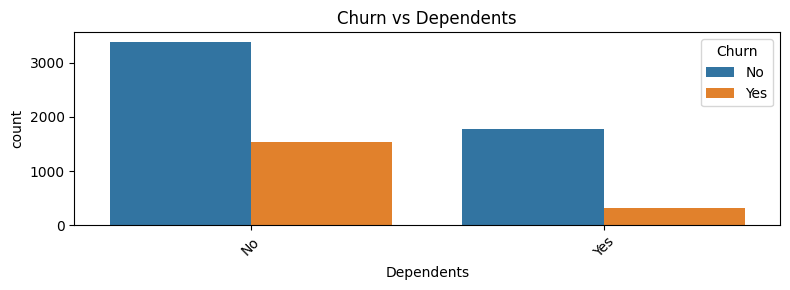

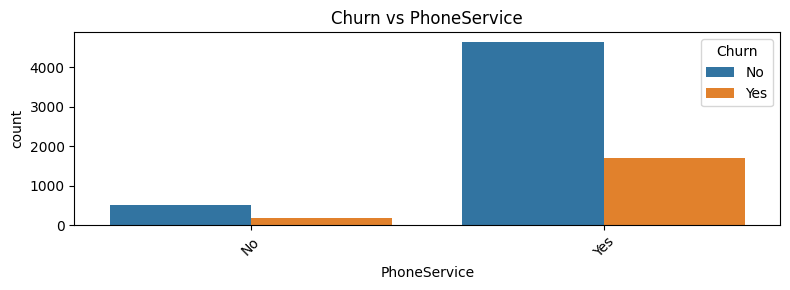

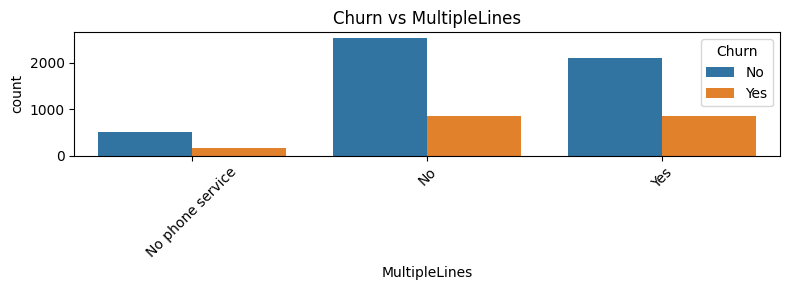

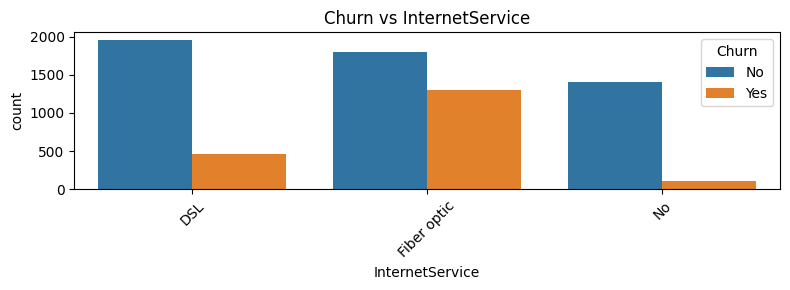

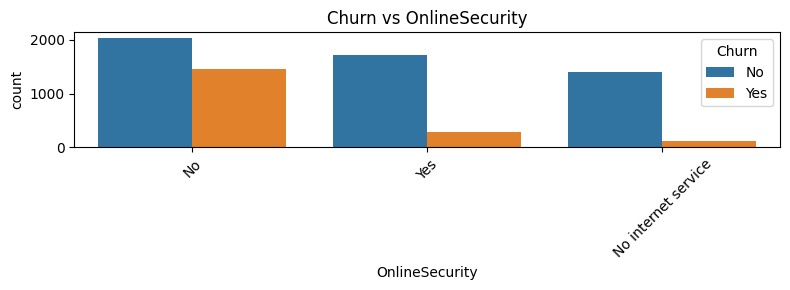

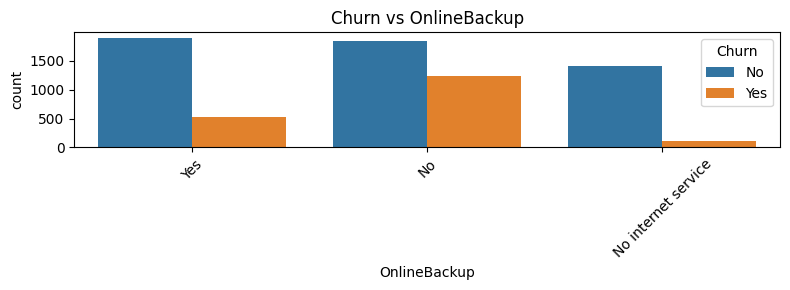

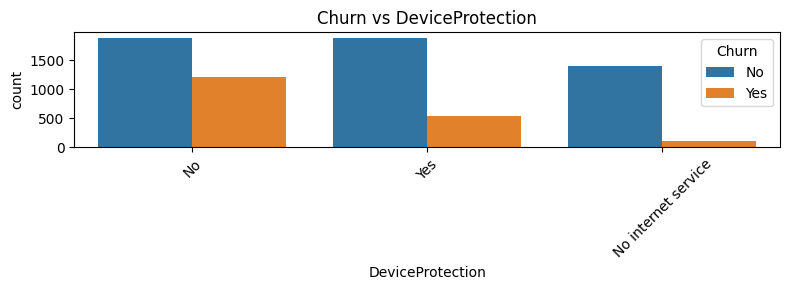

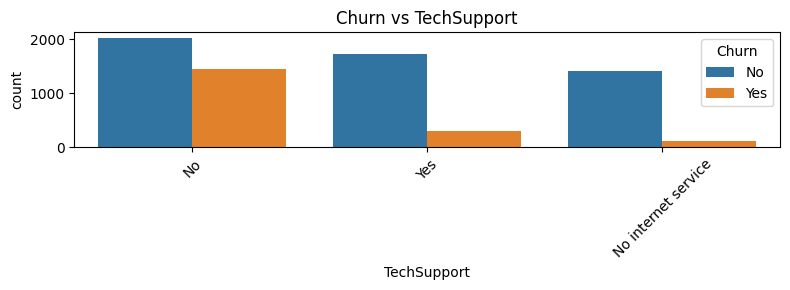

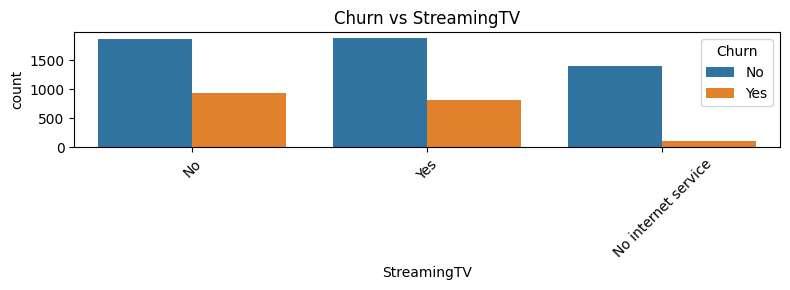

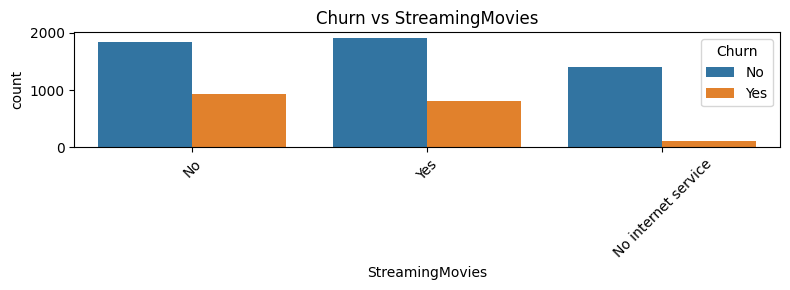

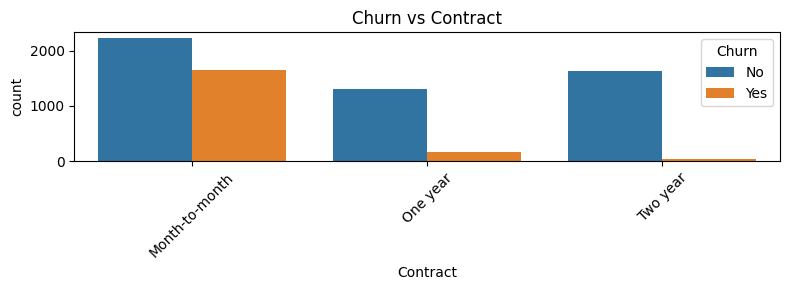

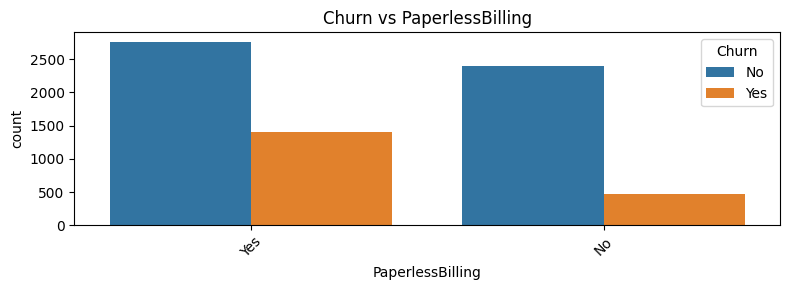

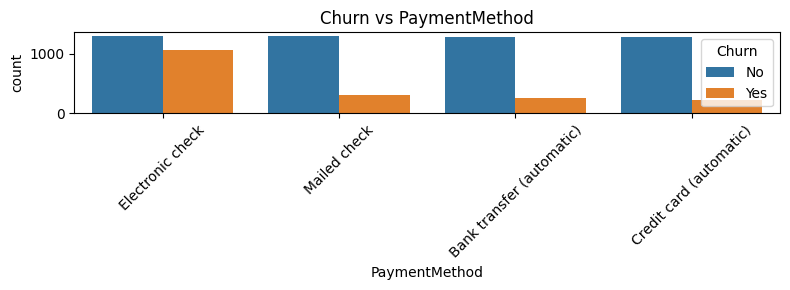

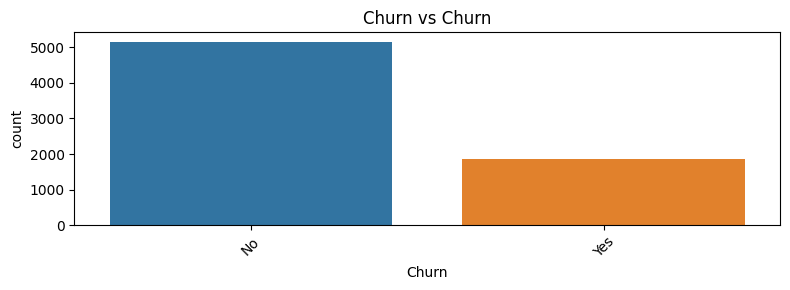

In [39]:
# Plot churn rate per category for selected variables
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../reports/figures/churn_vs_{col}.png")
    plt.show()
    # Insight: Look for dominant churn patterns in contract/payment/service categories


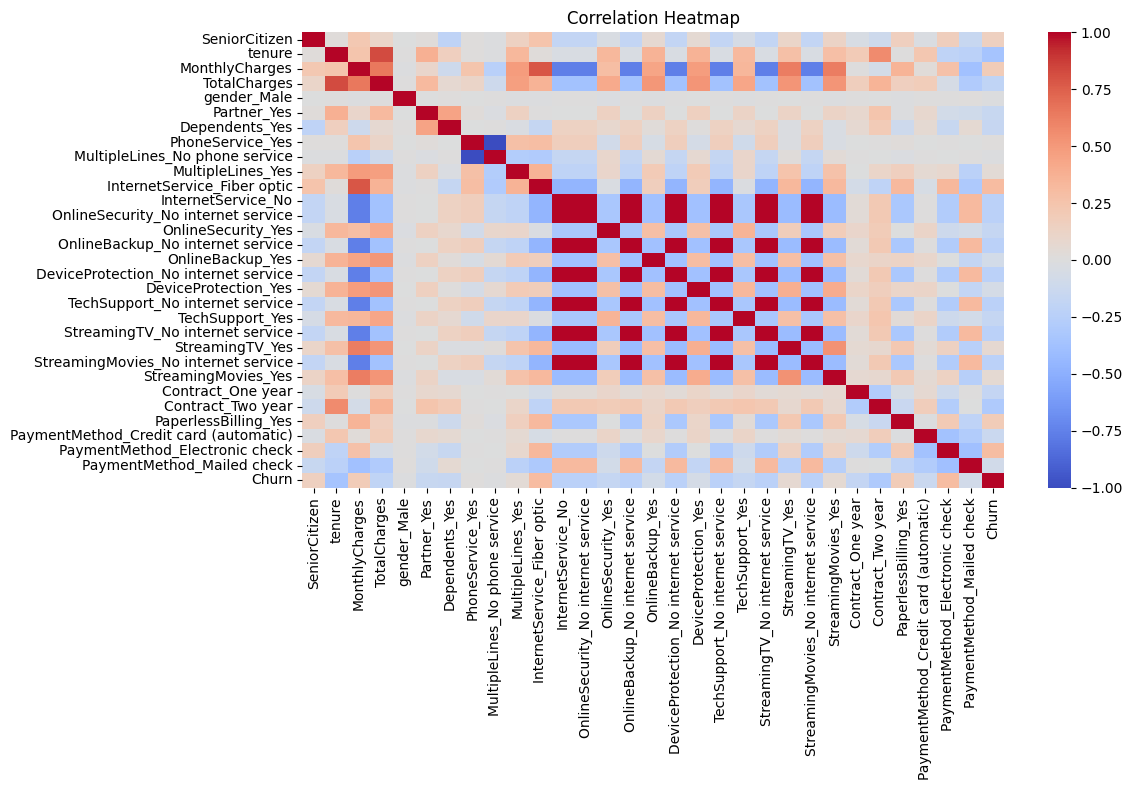

In [40]:
# Correlation heatmap
df_encoded = pd.get_dummies(df.drop(columns=['customerID', 'Churn']), drop_first=True)
df_encoded['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("../reports/figures/correlation_heatmap.png")
plt.show()
# Insight: Look for features most correlated with Churn (positive or negative)
